# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from pprint import pprint
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = [-90, 90]
lng_range = [-180, 180]


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low= -90.00, high=90.00, size=1500)
lngs = np.random.uniform(low= -180.00, high=180.00, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
        
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count

len(cities)


606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#to begin building url:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#testing url
query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=38f2b0ab59ff66d608492e9dafe16e96&q=mataura&units=imperial'

In [4]:
#getting response and checking format of response
weather_response = requests.get(query_url)
weather_response_json = weather_response.json()
pprint(weather_response_json)

{'base': 'stations',
 'clouds': {'all': 21},
 'cod': 200,
 'coord': {'lat': -46.19, 'lon': 168.86},
 'dt': 1594930934,
 'id': 6201424,
 'main': {'feels_like': 23.76,
          'grnd_level': 1013,
          'humidity': 98,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 28.98,
          'temp_max': 28.98,
          'temp_min': 28.98},
 'name': 'Mataura',
 'sys': {'country': 'NZ', 'sunrise': 1594930817, 'sunset': 1594963242},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'few clouds',
              'icon': '02d',
              'id': 801,
              'main': 'Clouds'}],
 'wind': {'deg': 57, 'speed': 2.06}}


In [5]:
#create lists to hold data
city_id = []
city_name = []
country = []
temperature = []
date =[]
humidity =[]
cloudiness = []
wind_speed = []
latitude =[]
longitude = []
weather_date=[]

#Loop through the city and country data to get required weather parameters
for city in cities:
    query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    response = requests.get(query_url).json()
     #save data in corresponding lists       
    try:
        
        city_id.append(response['id'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        temperature.append(response['main']['temp_max'])
        weather_date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        
    # Output line to terminal to mark progress and store it to a print log text file
        
        print(f"{city} with city ID:{(response['id'])} was found in the Weathermap API")
        
        
       
    except:
        print(f"{city} was not found in the Weathermap API")
        

busselton with city ID:2075265 was found in the Weathermap API
deputatskiy with city ID:2028164 was found in the Weathermap API
sao joao da barra with city ID:3448903 was found in the Weathermap API
vaini with city ID:4032243 was found in the Weathermap API
tasiilaq with city ID:3424607 was found in the Weathermap API
barrow with city ID:5880054 was found in the Weathermap API
kruisfontein with city ID:986717 was found in the Weathermap API
georgetown with city ID:1735106 was found in the Weathermap API
new norfolk with city ID:2155415 was found in the Weathermap API
talnakh with city ID:1490256 was found in the Weathermap API
saint-georges with city ID:3579925 was found in the Weathermap API
linchuan was not found in the Weathermap API
puerto ayora with city ID:3652764 was found in the Weathermap API
tsihombe was not found in the Weathermap API
rikitea with city ID:4030556 was found in the Weathermap API
punta arenas with city ID:3874787 was found in the Weathermap API
tuktoyaktuk wit

sao filipe with city ID:3374210 was found in the Weathermap API
kaitangata with city ID:2208248 was found in the Weathermap API
fallon with city ID:5503914 was found in the Weathermap API
nizhneyansk was not found in the Weathermap API
genhe with city ID:2037252 was found in the Weathermap API
komsomolskiy with city ID:1513491 was found in the Weathermap API
aklavik with city ID:5882953 was found in the Weathermap API
paamiut with city ID:3421193 was found in the Weathermap API
isiro with city ID:215771 was found in the Weathermap API
ayagoz with city ID:1525988 was found in the Weathermap API
grand river south east was not found in the Weathermap API
beringovskiy with city ID:2126710 was found in the Weathermap API
edd with city ID:338345 was found in the Weathermap API
conde with city ID:3385077 was found in the Weathermap API
barbar was not found in the Weathermap API
ha tinh with city ID:1581047 was found in the Weathermap API
los llanos de aridane with city ID:2514651 was found in

khatanga with city ID:2022572 was found in the Weathermap API
marzuq with city ID:72181 was found in the Weathermap API
tukrah with city ID:88834 was found in the Weathermap API
denpasar with city ID:1645528 was found in the Weathermap API
soc trang with city ID:1567788 was found in the Weathermap API
sur with city ID:286245 was found in the Weathermap API
lodwar with city ID:189280 was found in the Weathermap API
edendale with city ID:965301 was found in the Weathermap API
isla mujeres with city ID:3526756 was found in the Weathermap API
tilichiki with city ID:2120591 was found in the Weathermap API
ibra with city ID:287832 was found in the Weathermap API
bargal was not found in the Weathermap API
lagoa with city ID:3372964 was found in the Weathermap API
ostrovnoy with city ID:556268 was found in the Weathermap API
mudyuga was not found in the Weathermap API
nome with city ID:5870133 was found in the Weathermap API
kabinda with city ID:215527 was found in the Weathermap API
belmonte 

bassar with city ID:2367568 was found in the Weathermap API
formoso do araguaia was not found in the Weathermap API
warqla was not found in the Weathermap API
setermoen with city ID:3139765 was found in the Weathermap API
xining with city ID:1788852 was found in the Weathermap API
cayenne with city ID:3382160 was found in the Weathermap API
norman wells with city ID:6089245 was found in the Weathermap API
talaya with city ID:2120769 was found in the Weathermap API
palabuhanratu was not found in the Weathermap API
abha with city ID:110690 was found in the Weathermap API
forio with city ID:3176748 was found in the Weathermap API
dakar with city ID:2253354 was found in the Weathermap API
phuket with city ID:1151253 was found in the Weathermap API
cedar city with city ID:5536630 was found in the Weathermap API
malindi with city ID:187968 was found in the Weathermap API
turukhansk with city ID:1488903 was found in the Weathermap API
felidhoo was not found in the Weathermap API
hirara with c

celestun with city ID:3531368 was found in the Weathermap API
yakeshi with city ID:2033536 was found in the Weathermap API
cocobeach with city ID:2401357 was found in the Weathermap API
ulaangom with city ID:1515029 was found in the Weathermap API
puerto escondido with city ID:3520994 was found in the Weathermap API
portland with city ID:5746545 was found in the Weathermap API
saurimo with city ID:145531 was found in the Weathermap API
nova gradiska with city ID:3194449 was found in the Weathermap API
srednekolymsk with city ID:2121025 was found in the Weathermap API
kosh-agach with city ID:1502422 was found in the Weathermap API
himora was not found in the Weathermap API
linjiang with city ID:2036069 was found in the Weathermap API
mount isa with city ID:2065594 was found in the Weathermap API
ngunguru with city ID:2186111 was found in the Weathermap API
eureka with city ID:5563397 was found in the Weathermap API
antofagasta with city ID:3899539 was found in the Weathermap API
taichen

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#convert all lists to a dictionary 

weather_dict = {"City": city_name, "Latitude": latitude, "Longitude": longitude, 
              "Max Temp": temperature, "Humidity": humidity, "Cloudiness": cloudiness,
              "Wind Speed": wind_speed, "Country": country, "Date": weather_date}
#convert dict to a dataframe
weather_df = pd.DataFrame(weather_dict)

weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,52.00,88,56,10.04,AU,1594930776
1,Deputatsky,69.30,139.90,40.24,79,34,1.36,RU,1594930935
2,São João da Barra,-21.64,-41.05,71.60,68,75,6.93,BR,1594930935
3,Vaini,-21.20,-175.20,77.00,78,20,6.93,TO,1594930935
4,Tasiilaq,65.61,-37.64,48.20,66,100,13.87,GL,1594930935


In [7]:
# Export the dataframe into a csv
weather_df.to_csv(r'my_weather_data.csv')

In [8]:
#checking to see if there are null rows
weather_df.count()

City          545
Latitude      545
Longitude     545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [9]:
sorted_weather_df = weather_df.sort_values("Humidity", ascending=False)
sorted_weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
246,Denpasar,-8.65,115.22,77.00,100,20,3.36,ID,1594930979
229,Berlevåg,70.86,29.09,53.60,100,100,2.24,NO,1594930976
507,Eureka,40.80,-124.16,71.01,100,10,1.01,US,1594930862
359,Labuan,5.28,115.24,77.00,100,20,6.26,MY,1594930726
483,Luganville,-15.53,167.17,69.80,100,40,3.11,VU,1594930728


In [10]:
clean_weather = weather_df.loc[weather_df["Humidity"] > 100]
print(clean_weather)

Empty DataFrame
Columns: [City, Latitude, Longitude, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#skip, because no cities have humidity>100

In [12]:
#  Get the indices of cities that have humidity over 100%.
# skip, because no cities have humidity>100

In [13]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#skip, because no cities have humidity>100

In [14]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
#skip


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

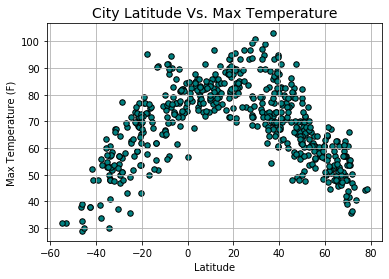

In [15]:
#build the scatter plots

x_latitude = weather_df["Latitude"]
y_temp = weather_df["Max Temp"]

plt.scatter(x_latitude, y_temp, s= 30, color="teal", edgecolor ="black")
plt.title("City Latitude Vs. Max Temperature", fontsize=14)
plt.grid(True)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Max Temperature (F)',fontsize=10)
plt.savefig('scatter_lat_vs_temp')
plt.show()



Analysis:
The temperatures increase as one approaches the equator. Cities that are further
away from the equator have lower temperatures. The highest maximum temperatures
recorded are for cities with latitudes 0 to 40 degrees

## Latitude vs. Humidity Plot

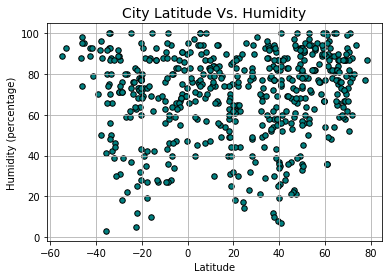

In [16]:
#build the scatter plots
y_humidity = weather_df["Humidity"]

plt.scatter(x_latitude, y_humidity, s= 30, color="teal", edgecolor ="black")
plt.title("City Latitude Vs. Humidity", fontsize=14)
plt.grid(True)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Humidity (percentage)',fontsize=10)
plt.savefig('scatter_lat_vs_humidity')
plt.show()

Analysis:
Humidity also is high in cities close to the equator. Many cities with latitude in the range 
0 to 40 have humidity >60%. 

## Latitude vs. Cloudiness Plot

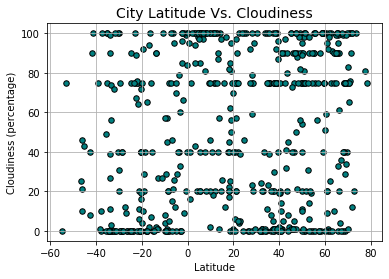

In [17]:
y_cloudiness = weather_df["Cloudiness"]

plt.scatter(x_latitude, y_cloudiness, s= 30, color="teal", edgecolor ="black")
plt.title("City Latitude Vs. Cloudiness", fontsize=14)
plt.grid(True)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Cloudiness (percentage)',fontsize=10)
plt.savefig('scatter_lat_vs_cloudiness')
plt.show()

Analysis:
Cloudiness appears to be fairly evenly distributed across latitudes. This is possibly dependent on
wind conditions of the city as well. It would be interesting to plot a graph of wind speed vs. cloudiness. 

## Latitude vs. Wind Speed Plot

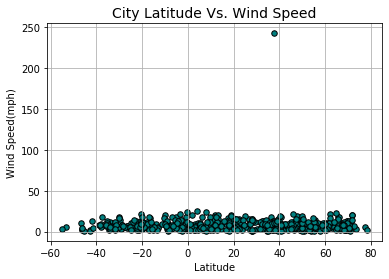

In [18]:
y_windspeed = weather_df["Wind Speed"]

plt.scatter(x_latitude, y_windspeed, s= 30, color="teal", edgecolor ="black")
plt.title("City Latitude Vs. Wind Speed", fontsize=14)
plt.grid(True)
plt.xlabel('Latitude', fontsize=10)
plt.ylabel('Wind Speed(mph)',fontsize=10)
plt.savefig('scatter_lat_vs_windspeed')
plt.show()

Analysis:
Overall wind speeds appear to be low, and not dependent on latitude. It would be interesting to note 
the time of year as I would anticipate a seasonal variation in wind speed in cities close to the equator. 

## Linear Regression

In [19]:
# Create Northern Hemisphere DataFrame

northern_df = weather_df.loc[weather_df["Latitude"]>=0, :]
northern_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Deputatsky,69.30,139.90,40.24,79,34,1.36,RU,1594930935
4,Tasiilaq,65.61,-37.64,48.20,66,100,13.87,GL,1594930935
5,Barrow,71.29,-156.79,35.60,80,90,12.75,US,1594930931
7,George Town,5.41,100.34,78.01,100,40,3.31,MY,1594930936
9,Talnakh,69.49,88.40,48.20,93,40,13.42,RU,1594930936


In [20]:
southern_df = weather_df.loc[weather_df["Latitude"]<0, :]
southern_df.head()


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,52.00,88,56,10.04,AU,1594930776
2,São João da Barra,-21.64,-41.05,71.60,68,75,6.93,BR,1594930935
3,Vaini,-21.20,-175.20,77.00,78,20,6.93,TO,1594930935
6,Kruisfontein,-34.00,24.73,48.56,56,39,3.94,ZA,1594930704
8,New Norfolk,-42.78,147.06,37.99,89,8,2.37,AU,1594930936


In [21]:
# OPTIONAL: Create a function to create Linear Regression plots

#create function that accepts parameters needed for the scatter
def line_regression_plot(x_values, y_values, x_desc, y_desc, 
                    hemisphere,file_name, x_notation, y_notation):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,s= 30, color="teal", edgecolor ="black")
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_notation, y_notation),fontsize=14,color="red")
    plt.title(f"{hemisphere}-\n {x_desc} vs. {y_desc}")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    plt.grid(True)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(file_name)
    plt.show


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7589372357156372
y = -0.53x + 91.42


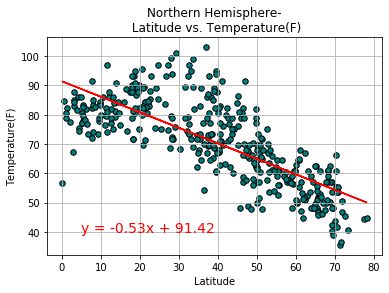

In [22]:
line_regression_plot(northern_df["Latitude"], northern_df["Max Temp"], 'Latitude', 'Temperature(F)', 
                     "Northern Hemisphere", "North_Lat_vs_Temp.png", 5, 40,)



Analysis:
There is a negative correlation between temperature and latitude, as one increases, the other decreases. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7752379386748013
y = 0.89x + 82.61


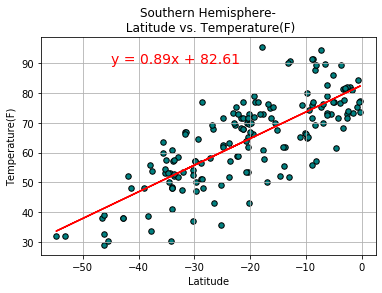

In [23]:
line_regression_plot(southern_df["Latitude"], southern_df["Max Temp"], 'Latitude', 'Temperature(F)', 
                     "Southern Hemisphere", "South_Lat_vs_Temp.png", -45, 90)


Analysis:
There is a very strong positive relationship between latitude and temperature in the Southern Hemisphere (this is because the latitude decreases as one approaches the equator from the Southern Hemishpere). 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1295571259928523
y = 0.13x + 65.22


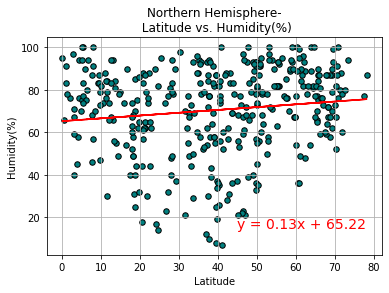

In [24]:
line_regression_plot(northern_df["Latitude"], northern_df["Humidity"], 'Latitude', 'Humidity(%)', 
                     "Northern Hemisphere", "North_Lat_vs_Humidity.png", 45, 15)

Analysis:
There is a very weak correlation between humidity and latitude, indicating that cities with higher latitudes do not necessarily have more humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: -0.14047325785607137
y = -0.25x + 62.24


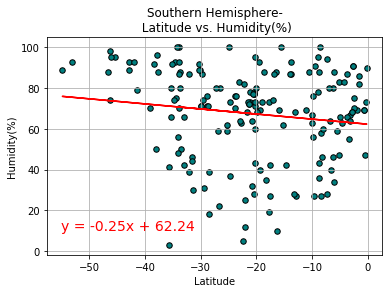

In [25]:
line_regression_plot(southern_df["Latitude"], southern_df["Humidity"], 'Latitude', 'Humidity(%)', 
                     "Southern Hemisphere", "South_Lat_vs_Humidity.png", -55, 10)

Analysis:
There is a very weak correlation between humidity and latitude, indicating that cities with higher latitudes do not necessarily have more humidity. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: -0.01023036283646378
y = -0.02x + 56.21


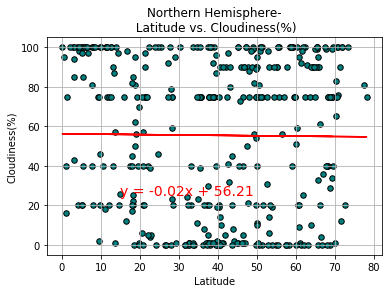

In [26]:
line_regression_plot(northern_df["Latitude"], northern_df["Cloudiness"], 'Latitude', 'Cloudiness(%)', 
                     "Northern Hemisphere", "North_Lat_vs_Cloudiness.png", 15,25)

Analysis: No significant correlation between latitude and cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08627536771363808
y = 0.25x + 42.46


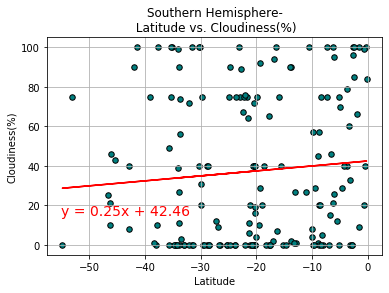

In [27]:
line_regression_plot(southern_df["Latitude"], southern_df["Cloudiness"], 'Latitude', 'Cloudiness(%)', 
                     "Southern Hemisphere", "South_Lat_vs_Cloudiness.png", -55, 15)

Analysis: No significant correlation between latitude and cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.03974739092793918
y = -0.03x + 9.58


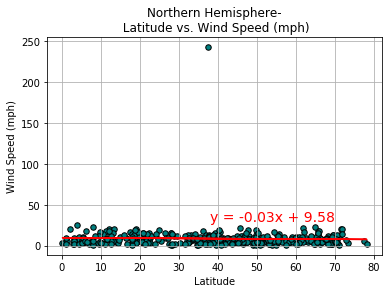

In [28]:
line_regression_plot(northern_df["Latitude"], northern_df["Wind Speed"], 'Latitude', 'Wind Speed (mph)', 
                     "Northern Hemisphere", "North_Lat_vs_windspeed.png", 38, 30)

Analysis: No significant correlation between latitude and windspeed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1757925792800047
y = 0.06x + 8.91


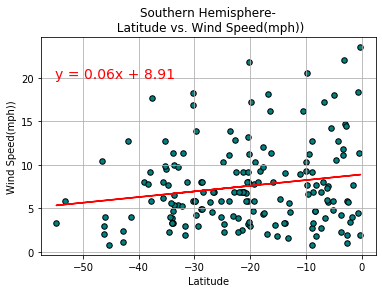

In [29]:
line_regression_plot(southern_df["Latitude"], southern_df["Wind Speed"], 'Latitude', 'Wind Speed(mph))', 
                     "Southern Hemisphere", "South_Lat_vs_windspeed.png", -55, 20)

Analysis: No significant correlation between latitude and windspeed. 